<a href="https://colab.research.google.com/github/Dipta04/Machine-Learning/blob/main/AI_ML_Assignment_3_Module_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 AI/ML Assignment 3
## Supervised Learning Models in Practice

**Total Marks: 100**  
**Submission Format:** Single Jupyter Notebook (`.ipynb`)

---
## 📌 General Instructions (Read Carefully)

- This assignment covers **Modules 13–18**.
- Use **Python and scikit-learn only**.
- Do NOT use AutoML, deep learning, or external ML libraries.
- Fix `random_state=42` wherever applicable.
- Plots must be labeled and readable.
- Do not delete or rename cells.

***Classification Dataset:*** https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data

***Regresssion Dataset:*** https://www.kaggle.com/datasets/mirichoi0218/insurance

## 🔧 TODO 0: Environment Setup (5 Marks)
**Marks Breakdown:**
- Correct imports (3)
- Clean setup, no unused imports (2)


In [ ]:
# TODO: Import all necessary libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

# 🔵 PART A: Regression Task (45 Marks)
You will work with the provided **regression dataset**.


## TODO A1: Dataset Loading and Understanding (5 Marks)
**You must:**
- Load the dataset
- Show shape and column names
- Identify target variable

**Marks:** Data loading (2), Explanation (3)


In [ ]:
# TODO: Load regression dataset
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
print(df.shape)
print(df.columns)

(1338, 7)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


### Explanation

This dataset has 7 columns and 1338 rows.
Here target variable is **charges**. Based on the other column's information, we will predict charges with different models.

## TODO A2: Exploratory Data Analysis (EDA) (5 Marks)
**You must:**
- Show descriptive statistics
- Plot correlation heatmap
- Plot at least one feature vs target

**Marks:** Plots (3), Interpretation (2)


In [ ]:
# TODO: Perform EDA
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.nunique()

,0
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


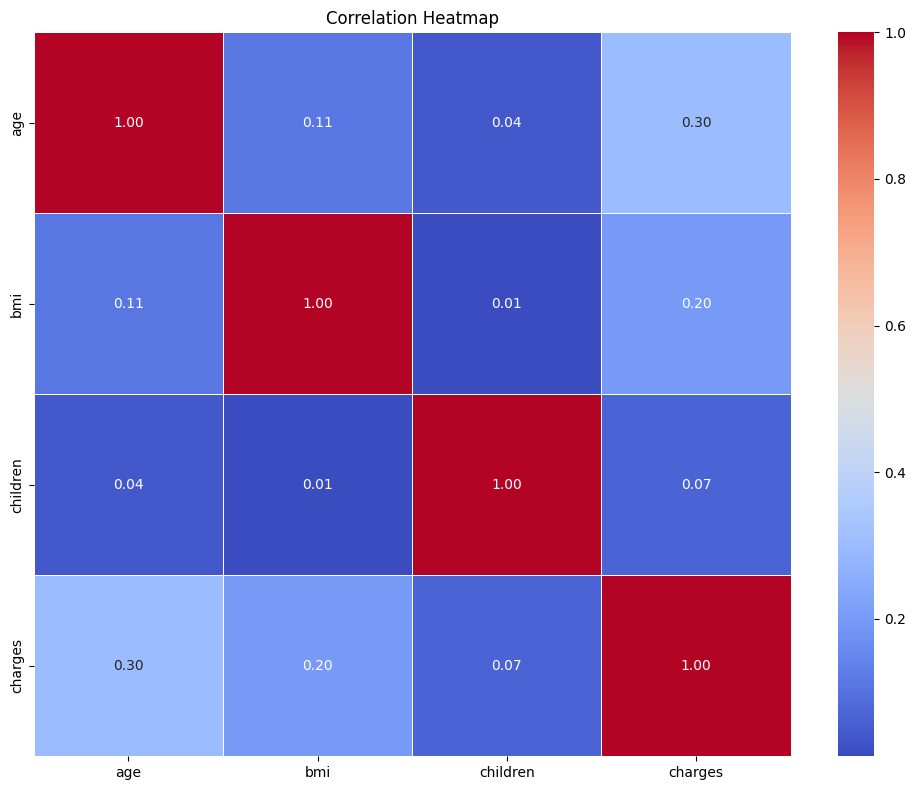

In [ ]:
target_col = "charges"
numerical_col = ["age", "bmi", "children"]
categorical_col = ["sex", "smoker", "region"]

corr_matrix = df[numerical_col + [target_col]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap = "coolwarm", fmt = ".2f", linewidths = 0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

/tmp/ipython-input-1160767265.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_charges = df.groupby('age_group')['charges'].mean()


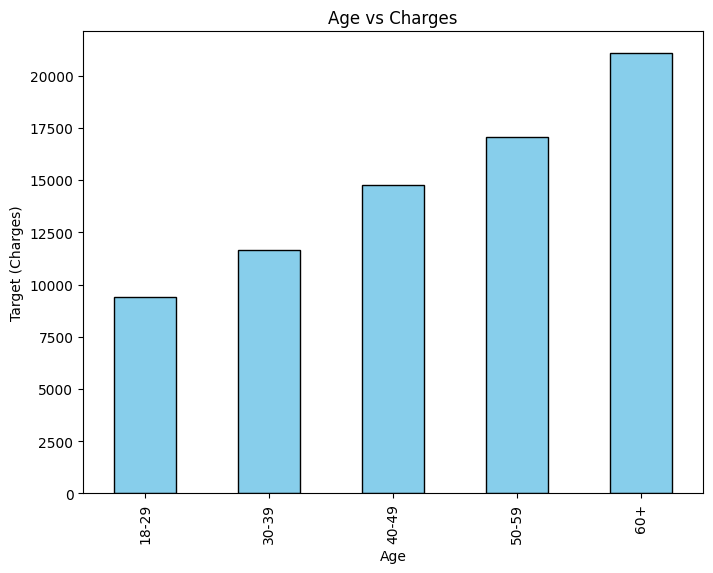

In [ ]:
df['age_group'] = pd.cut(df['age'], bins = [0, 30, 40, 50, 60, 80], labels = ['18-29', '30-39', '40-49', '50-59', '60+'])
avg_charges = df.groupby('age_group')['charges'].mean()

plt.figure(figsize=(8,6))
avg_charges.plot(kind='bar', color = 'skyblue', edgecolor = 'black')
plt.xlabel("Age")
plt.ylabel("Target (Charges)")
plt.title("Age vs Charges")
plt.show()

## TODO A3: Feature Preparation (5 Marks)
**You must:**
- Train-test split
- Scaling (if applicable)

**Marks:** Correct split (3), Explanation (2)


In [ ]:
# TODO: Prepare features
le = LabelEncoder()
df["sex"] = le.fit_transform(df['sex'])
df["smoker"] = le.fit_transform(df['smoker'])

In [ ]:
df_copy = df.copy()
df_copy.drop(columns=['age_group'], inplace=True)
df_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [ ]:
df_copy = pd.get_dummies(
    df_copy,
    columns = ["region"],
    dtype = int
)

df_copy.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [ ]:
X = df_copy.drop(columns=[target_col])
y = df_copy[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
scaler_sd = StandardScaler()
X_train_std = scaler_sd.fit_transform(X_train)
X_test_std = scaler_sd.transform(X_test)

## Explanation

I think here scaling is needed because here the age and bmi feature have bigger values than other features. If we don't do scaling they will affect the model more than the other features, even though they are important. So that's why scaling is important in this dataset.

## TODO A4: Multiple Linear Regression (8 Marks)
**You must:**
- Train model
- Evaluate using RMSE, MAE, R²

**Marks:** Model (4), Metrics (4)


In [ ]:
# TODO: Multiple Linear Regression
model_linear = LinearRegression()
model_linear.fit(X_train_std, y_train)

y_pred = model_linear.predict(X_test_std)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE : ", rmse)
print("MAE : ", mae)
print("R2 score : ", r2)

RMSE :  5926.023602394469
MAE :  4243.654116653146
R2 score :  0.7672642952734356


## TODO A5: Polynomial Regression (7 Marks)
**You must:**
- Apply polynomial features
- Compare with linear regression

**Marks:** Implementation (4), Comparison (3)


In [ ]:
# TODO: Polynomial Regression
degrees = [1, 2, 3, 4, 5]
result = []

for deg in degrees:
  model = Pipeline([
      ('poly', PolynomialFeatures(degree=deg, include_bias=False)),
      ('lin_reg', LinearRegression())
  ])

  model.fit(X_train_std, y_train)
  y_pred_poly = model.predict(X_test_std)

  mae = mean_absolute_error(y_test, y_pred_poly)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred_poly))
  r2 = r2_score(y_test, y_pred_poly)

  result.append({
      "degree": deg,
      "MAE": mae,
      "RMSE": rmse,
      "R2": r2
  })

result_df = pd.DataFrame(result)
result_df

,degree,MAE,RMSE,R2
0,1,4243.654117,5926.023602,0.767264
1,2,2781.710181,4689.452858,0.854259
2,3,2965.086200,4922.301801,0.839427
3,4,3731.838163,6527.064465,0.717660
4,5,5558.144905,12994.712970,-0.119102


##Explanation

Here we can see that when we implement polynomial feature, we get better results in degrees 2 and 3 than normal linear regression.

## TODO A6: Support Vector Regression (7 Marks)
**You must:**
- Train SVR (RBF kernel)
- Evaluate performance
- Justify kernel choice

**Marks:** Model (4), Justification (3)


In [ ]:
# TODO: Support Vector Regression
pipeline = Pipeline([
    ('svr', SVR())
])

param_grid = {
    'svr__kernel': ['rbf'],
    'svr__C' : [0.1, 1.0, 10],
    'svr__gamma' : ['scale', 0.01, 0.1, 1.0],
    'svr__epsilon' : [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(
    estimator = pipeline,
    param_grid = param_grid,
    cv = 3,
    scoring = 'r2',
    n_jobs = -1
)

grid_search.fit(X_train_std, y_train)

print(grid_search.best_params_)

{'svr__C': 10, 'svr__epsilon': 0.2, 'svr__gamma': 0.1, 'svr__kernel': 'rbf'}


In [ ]:
svr_rbf = SVR(kernel='rbf',C=10, epsilon=0.2, gamma=0.1)
svr_rbf.fit(X_train_std, y_train)

y_pred_rbf = svr_rbf.predict(X_test_std)

mae_svr = mean_absolute_error(y_test, y_pred_rbf)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_rbf))
r2_svr = r2_score(y_test, y_pred_rbf)

print("RMSE : ", rmse_svr)
print("MAE : ", mae_svr)
print("R2 score : ", r2_svr)

RMSE :  12672.55381971853
MAE :  8265.529675109292
R2 score :  -0.06430119507411058


In [ ]:
pipeline = Pipeline([
    ('svr', SVR())
])

param_grid = {
    'svr__kernel': ['linear','rbf','poly'],
    'svr__C' : [0.1, 1.0, 10],
    'svr__gamma' : ['scale', 0.01, 0.1, 1.0],
    'svr__epsilon' : [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(
    estimator = pipeline,
    param_grid = param_grid,
    cv = 3,
    scoring = 'r2',
    n_jobs = -1
)

grid_search.fit(X_train_std, y_train)

print(grid_search.best_params_)

{'svr__C': 10, 'svr__epsilon': 0.01, 'svr__gamma': 1.0, 'svr__kernel': 'poly'}


##Explanation
After implementing GridSearchCV, we can see that the Polynomial Kernel is a better choice than the RBF kernel for this dataset. And the results are better in Polynomial Regression than the SVR model.

## TODO A7: Random Forest Regressor (8 Marks)
**You must:**
- Train Random Forest
- Evaluate model

**Marks:** Model (4), Evaluation (4)


In [ ]:
# TODO: Random Forest Regressor
rf_param_grid = {
    "n_estimators": [100,150,175,200],
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 3, 5],
    "max_features": ["sqrt", "log2"]
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_param_grid,
    cv = 5,
    scoring = 'r2',
    n_jobs=-1
)

grid_rf.fit(X_train_std, y_train)

print(grid_rf.best_params_)

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 3, 'n_estimators': 150}


In [ ]:
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_std)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("RMSE : ", rmse_rf)
print("MAE : ", mae_rf)
print("R2 score : ", r2_rf)

RMSE :  4571.523104950768
MAE :  2732.4374519472017
R2 score :  0.861497344774403


##Explanation
After implementing Random Forest Regression, we got better results and r2 score than the previous models.

# 🟠 PART B: Classification Task (45 Marks)
You will work with the provided **classification dataset**.


## TODO B1: Dataset Understanding (5 Marks)
**You must:**
- Load dataset
- Show class distribution
- Comment on imbalance

**Marks:** Analysis (3), Explanation (2)


In [ ]:
# TODO: Load classification dataset
df_classification = pd.read_csv('loan_data.csv')
df_classification.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
df_classification.shape

(45000, 14)

In [ ]:
df_classification.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
df_classification.nunique()

,0
person_age,60
person_gender,2
person_education,5
person_income,33989
person_emp_exp,63
person_home_ownership,4
loan_amnt,4483
loan_intent,6
loan_int_rate,1302
loan_percent_income,64


In [ ]:
df_classification.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,45000.0,27.764178,6.045108,20.00,24.00,26.00,30.00,144.00
person_income,45000.0,80319.053222,80422.498632,8000.00,47204.00,67048.00,95789.25,7200766.00
person_emp_exp,45000.0,5.410333,6.063532,0.00,1.00,4.00,8.00,125.00
loan_amnt,45000.0,9583.157556,6314.886691,500.00,5000.00,8000.00,12237.25,35000.00
loan_int_rate,45000.0,11.006606,2.978808,5.42,8.59,11.01,12.99,20.00
loan_percent_income,45000.0,0.139725,0.087212,0.00,0.07,0.12,0.19,0.66
cb_person_cred_hist_length,45000.0,5.867489,3.879702,2.00,3.00,4.00,8.00,30.00
credit_score,45000.0,632.608756,50.435865,390.00,601.00,640.00,670.00,850.00
loan_status,45000.0,0.222222,0.415744,0.00,0.00,0.00,0.00,1.00


In [ ]:
df_classification['loan_status'].value_counts()

,count
loan_status,
0,35000
1,10000


##Comment
Here we can see that the not-approved class is about 35000, and the approved class count is about 10000. There is an imbalance between classes, but it will be okay for real-life model training.

## TODO B2: Exploratory Data Analysis (5 Marks)
**You must:**
- Plot class counts
- Plot at least one feature vs class

**Marks:** Plots (5),


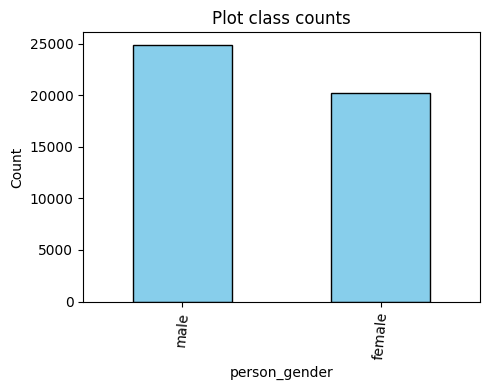

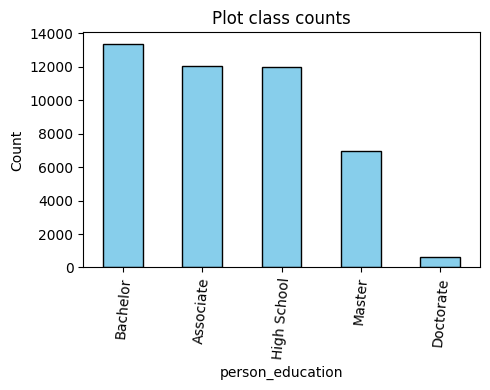

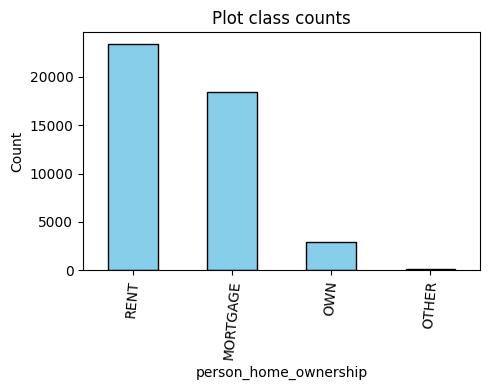

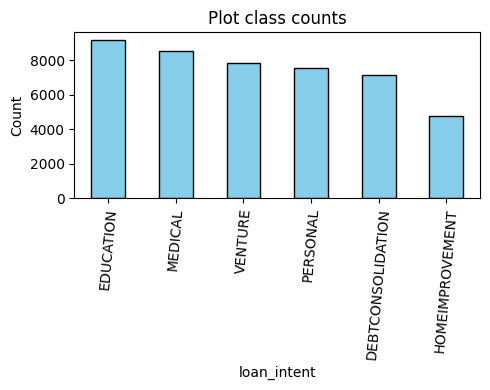

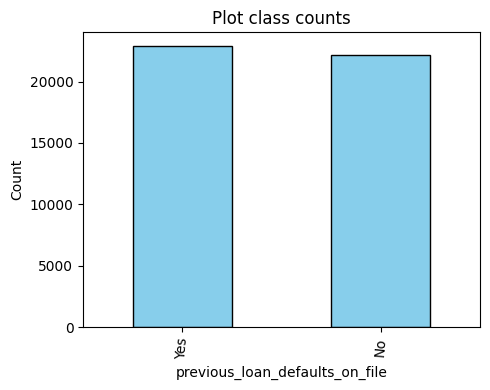

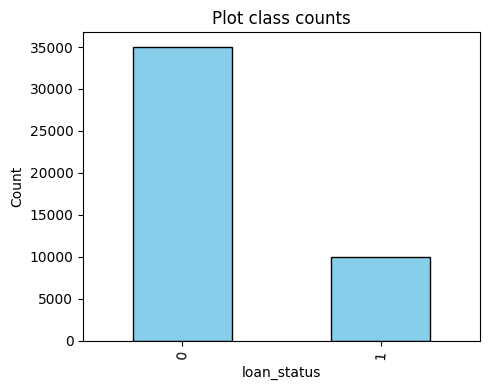

In [ ]:
# TODO: Classification EDA
categorial_cols_classification = ["person_gender", "person_education", "person_home_ownership", "loan_intent", "previous_loan_defaults_on_file", "loan_status"]

for col in categorial_cols_classification:
  plt.figure(figsize=(5,4))
  df_classification[col].value_counts().plot(kind='bar', color = 'skyblue', edgecolor = 'black', )
  plt.title("Plot class counts")
  plt.ylabel("Count")
  plt.xticks(rotation=85)
  plt.tight_layout()
  plt.show()


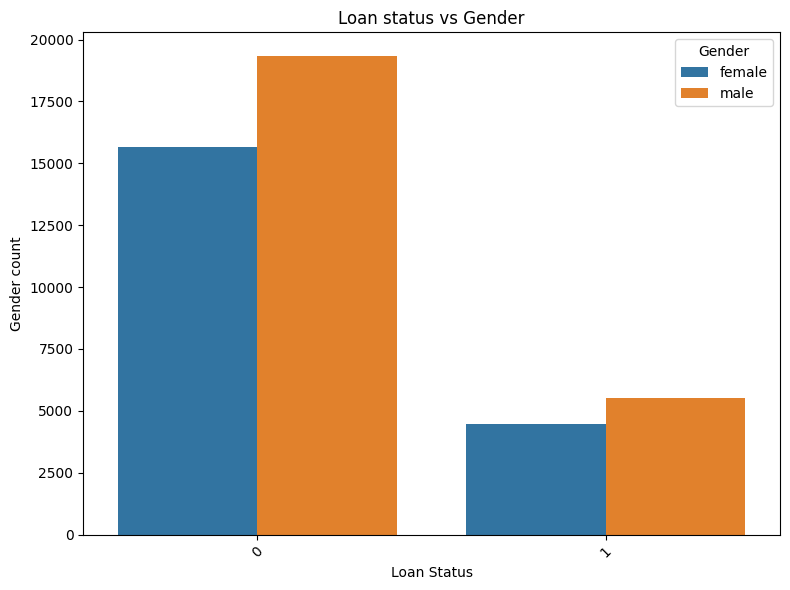

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_classification, x="loan_status", hue="person_gender")
plt.title("Loan status vs Gender")
plt.xlabel("Loan Status")
plt.ylabel("Gender count")
plt.xticks(rotation = 45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

## TODO B3: Feature Preparation (5 Marks)
**You must:**
- Encoding (if needed)
- Scaling
- Train-test split with stratification




In [ ]:
# TODO: Prepare classification features

df_classification_copy = df_classification.copy()

le_classification = LabelEncoder()
df_classification_copy["person_gender"] = le_classification.fit_transform(df_classification_copy["person_gender"])
df_classification_copy["previous_loan_defaults_on_file"] = le_classification.fit_transform(df_classification_copy["previous_loan_defaults_on_file"])

In [ ]:
df_classification_copy = pd.get_dummies(
    df_classification_copy,
    columns = ["person_education","person_home_ownership","loan_intent"],
    dtype=int
)

In [ ]:
df_classification_copy.head()

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,71948.0,0,35000.0,16.02,0.49,3.0,561,0,...,0,0,0,1,0,0,0,0,1,0
1,21.0,0,12282.0,0,1000.0,11.14,0.08,2.0,504,1,...,0,0,1,0,0,1,0,0,0,0
2,25.0,0,12438.0,3,5500.0,12.87,0.44,3.0,635,0,...,1,0,0,0,0,0,0,1,0,0
3,23.0,0,79753.0,0,35000.0,15.23,0.44,2.0,675,0,...,0,0,0,1,0,0,0,1,0,0
4,24.0,1,66135.0,1,35000.0,14.27,0.53,4.0,586,0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
target_col_classification = "loan_status"
scale_feature = ["person_age", "person_income", "person_emp_exp", "loan_amnt","loan_int_rate", "cb_person_cred_hist_length", "credit_score"]

X = df_classification_copy.drop(columns=[target_col_classification])
y = df_classification_copy[target_col_classification]

X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(X, y, test_size = .25, random_state=42, stratify=y)

scaler_classification = StandardScaler()
X_train_classification[scale_feature] = scaler_classification.fit_transform(X_train_classification[scale_feature])
X_test_classification[scale_feature] = scaler_classification.transform(X_test_classification[scale_feature])

## TODO B4: Logistic Regression with L2 (8 Marks)
**You must:**
- Train Logistic Regression
- Evaluate using Accuracy, Precision, Recall
- Show Confusion Matrix

**Marks:** Model (4), Metrics (4)


In [ ]:
# TODO: Logistic Regression
model_logistic_regression = LogisticRegression()
model_logistic_regression.fit(X_train_classification, y_train_classification)

LogisticRegression()

In [ ]:
model_logistic_regression_pred = model_logistic_regression.predict(X_test_classification)

In [ ]:
print("Accuracy : ", accuracy_score(y_test_classification, model_logistic_regression_pred))
print("Precision : ", precision_score(y_test_classification, model_logistic_regression_pred))
print("Recall : ", recall_score(y_test_classification, model_logistic_regression_pred))

Accuracy :  0.8997333333333334
Precision :  0.7899408284023669
Recall :  0.7476


Confusion Matrix
 [[8253  497]
 [ 631 1869]]


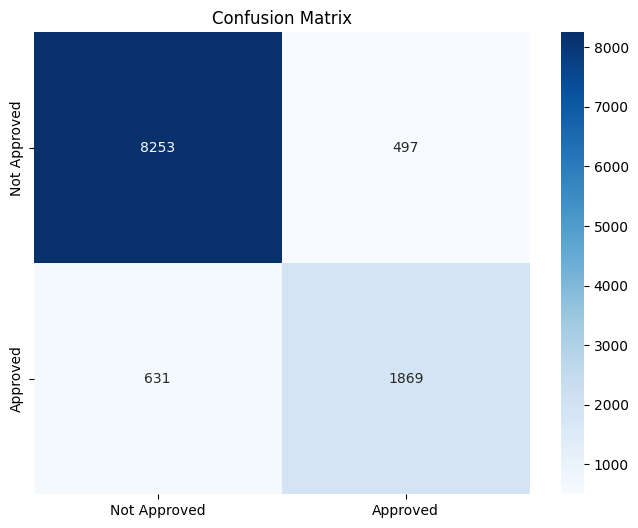

In [ ]:
print("Confusion Matrix\n", confusion_matrix(y_test_classification, model_logistic_regression_pred))

cm = confusion_matrix(y_test_classification, model_logistic_regression_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title("Confusion Matrix")
plt.show()

## TODO B5: Support Vector Machine (7 Marks)
**You must:**
- Train SVM (Linear or RBF)
- Evaluate

**Marks:** Model (4), Evaluation (3)


In [ ]:
# TODO: SVM Classification
pipeline_classification = Pipeline([
    ('svc', SVC())
])

param_grid_classification = {
    'svc__kernel': ['linear','rbf'],
    'svc__C' : [0.1, 1.0, 10],
    'svc__gamma' : ['scale', 0.01, 0.1, 1.0]
}

grid_search_classification = GridSearchCV(
    estimator = pipeline_classification,
    param_grid = param_grid_classification,
    cv = 2,
    scoring = 'f1',
    n_jobs = -1
)

grid_search_classification.fit(X_train_classification, y_train_classification)

print(grid_search_classification.best_params_)

{'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [ ]:
svc_classification = SVC(kernel="rbf", C=10, gamma=0.01, random_state=42)
svc_classification.fit(X_train_classification, y_train_classification)

model_svc_classification_pred = svc_classification.predict(X_test_classification)

In [ ]:
print("Accuracy : ", accuracy_score(y_test_classification, model_svc_classification_pred))
print("Precision : ", precision_score(y_test_classification, model_svc_classification_pred))
print("Recall : ", recall_score(y_test_classification, model_svc_classification_pred))

Accuracy :  0.9151111111111111
Precision :  0.832258064516129
Recall :  0.774


## TODO B6: Naive Bayes (5 Marks)
**You must:**
- Choose correct NB variant



In [ ]:
# TODO: Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_classification, y_train_classification)
model_gnb_classification_pred = gnb.predict(X_test_classification)

In [ ]:
print("Accuracy : ", accuracy_score(y_test_classification, model_gnb_classification_pred))
print("Precision : ", precision_score(y_test_classification, model_gnb_classification_pred))
print("Recall : ", recall_score(y_test_classification, model_gnb_classification_pred))

Accuracy :  0.7544
Precision :  0.4745500290303851
Recall :  0.9808


In [ ]:
# TODO: Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train_classification, y_train_classification)
model_bnb_classification_pred = bnb.predict(X_test_classification)

In [ ]:
print("Accuracy : ", accuracy_score(y_test_classification, model_bnb_classification_pred))
print("Precision : ", precision_score(y_test_classification, model_bnb_classification_pred))
print("Recall : ", recall_score(y_test_classification, model_bnb_classification_pred))

Accuracy :  0.8483555555555555
Precision :  0.6480238627889635
Recall :  0.6952


## Explanation

In this dataset, I don't need any count or frequency, which is why MultinomialNB is not appropriate for this dataset. My dataset has continuous values in the x-axis feature, still I got better accuracy and more balanced recall, precision in BernoulliNB than the GaussianNB. So in this dataset, BernoulliNB is more appropriate.

## TODO B7: K-Nearest Neighbors (5 Marks)
**You must:**
- Try multiple K values
- Plot accuracy vs K

**Marks:** Experiment (3), Plot & choice (2)


In [ ]:
# TODO: KNN
K_values = range(1, 50)
accuracy_scores = []

for k in K_values:
  model_knn = Pipeline([
      ("knn", KNeighborsClassifier(n_neighbors=k))
  ])

  model_knn.fit(X_train_classification, y_train_classification)
  y_pred_knn = model_knn.predict(X_test_classification)
  accuracy_scores.append(accuracy_score(y_test_classification, y_pred_knn))

In [ ]:
print(accuracy_scores)

[0.8421333333333333, 0.8506666666666667, 0.8671111111111112, 0.8632888888888889, 0.8718222222222223, 0.8677333333333334, 0.8733333333333333, 0.8705777777777778, 0.8742222222222222, 0.8726222222222222, 0.8764444444444445, 0.872, 0.8744888888888889, 0.8722666666666666, 0.8760888888888889, 0.8722666666666666, 0.8766222222222222, 0.8731555555555556, 0.8765333333333334, 0.8736, 0.8744888888888889, 0.8717333333333334, 0.8755555555555555, 0.8739555555555556, 0.876, 0.8737777777777778, 0.8754666666666666, 0.8725333333333334, 0.8756444444444444, 0.8729777777777777, 0.8745777777777778, 0.8731555555555556, 0.8743111111111111, 0.8745777777777778, 0.8758222222222222, 0.8752888888888889, 0.8759111111111111, 0.8746666666666667, 0.8755555555555555, 0.8740444444444444, 0.8761777777777778, 0.8742222222222222, 0.8763555555555556, 0.8739555555555556, 0.8755555555555555, 0.8739555555555556, 0.8745777777777778, 0.8734222222222222, 0.8743111111111111]


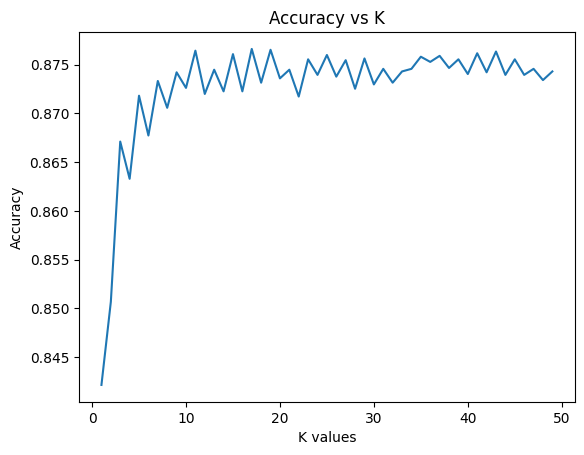

Best K :  17
Best Accuracy :  0.8766222222222222


In [ ]:
plt.figure()
plt.plot(list(K_values), accuracy_scores)
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.show()

best_k = list(K_values)[int(np.argmax(accuracy_scores))]
print("Best K : ", best_k)
print("Best Accuracy : ", float(np.max(accuracy_scores)))

## TODO B8: Random Forest Classifier (5 Marks)
**You must:**
- Train model
- Show feature importance

**Marks:** Model (3), Interpretation (2)


In [ ]:
# TODO: Random Forest Classifier
param_grid_random_forest = {
    "n_estimators": [100,150,175,200],
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2,3,5],
    "max_features": ["sqrt", "log2"]
}

In [ ]:
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_random_forest,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

grid_rf.fit(X_train_classification, y_train_classification)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 150, 175, 200]},
             scoring='f1')

In [ ]:
print(grid_rf.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 3, 'n_estimators': 150}


In [ ]:
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_classification)

In [ ]:
print("Accuracy : ", accuracy_score(y_test_classification, y_pred_rf))
print("Precision : ", precision_score(y_test_classification, y_pred_rf))
print("Recall : ", recall_score(y_test_classification, y_pred_rf))
print("f1 : ", f1_score(y_test_classification, y_pred_rf))

Accuracy :  0.9286222222222222
Precision :  0.9019422074846044
Recall :  0.7616
f1 :  0.8258512253307309


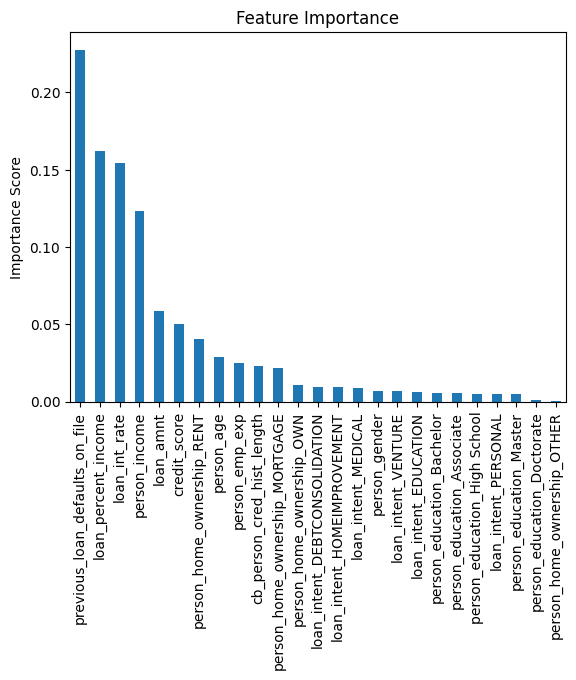

In [ ]:
feature_importances = pd.Series(
    best_rf.feature_importances_,
    index=X_train_classification.columns
).sort_values(ascending=False)

feature_importances.plot(kind="bar")
plt.title("Feature Importance")
plt.ylabel("Importance Score")
plt.show()

# 🧠 Final Reflection (5 Marks)
**Answer briefly:**
- Best regression model and why
- Best classification model and why
- One real-world deployment scenario


## TODO: Write your reflection here

## Final Reflection



1.   Here, I found the best regression model for this dataset is Random Forest Regression. In this dataset, we have lots of complex features and continuous values and a nonlinear relationship, which is handled nicely through the Random Forest Regression model.

2.   Here, I found the best classification model for this dataset is Random Forest Classification. Here we got almost 92 percent accuracy and good balanced recall, precision and F1 score. Random forest model is a strong ensemble method that works well in this kind of dataset.

3.  The knowledge I got from this assignment will help me a lot in real-world model deployment. Now I knew how scaling and encoding affect the results. I know how to find out the best parameter values for the model. I know how to try out different models and find the best model for the specific dataset.
